In [1]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt 

from regression_utils import *

np.set_printoptions(suppress=True)
%matplotlib inline

In [2]:
# convention followed in relation to scikit documentation 
# y = countryQuantity 
# y1 = countryQuantityTrain
# Y = countryQuantityTest
# y_pred = countryQuantityPredict

# X = years 
# X1 = yearsTrain
# x_mis = yearsTest
# x = yearsPredict

# c = combinedZip

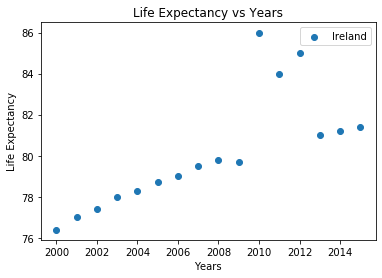

Train:Test split is:  6 : 10


In [11]:
#reading data from csv 
df = pd.read_csv('datasets_12603_17232_Life Expectancy Data.csv')

# Quantity variation of 3 countries (Germany, Netherlands, Spain)
# change here 
country = 'Ireland'
countryDataFrame = countryDF(country, df)
countryQuantity = columnExtractor(countryDataFrame,'Life expectancy')
#print(countryQuantity)
    
years = columnExtractor(countryDataFrame,'Year')
#print(years)

percentage_expenditure = columnExtractor(countryDataFrame,'percentage expenditure')
#print(percentage_expenditure)

#plotQuantities(years, countryQuantity,'Years','Population', country,'Population vs Years')
plotQuantities(years, countryQuantity, 'Years', 'Life Expectancy', country, 'Life Expectancy vs Years')

split = np.random.randint(1,15)
countryQuantityTrain, yearsTrain, countryQuantityTest, yearsTest = randomizer(countryQuantity, years, split)


length scale is:  25


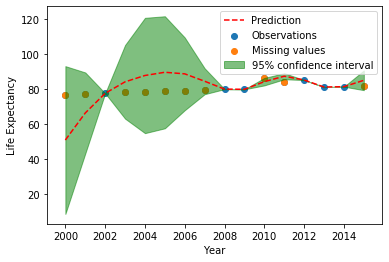

In [12]:
countryQuantityPredict, sigma = gaussianRegression(yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, years, countryQuantity) 

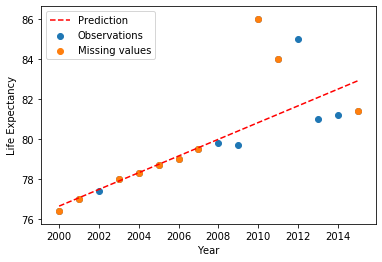

In [13]:
countryQuantityPredictLR = linearRegression(yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, years, countryQuantity)

GPR Prediction 
 [[50.69863513 66.1498617  77.4        83.96952511 87.59299562 89.43215761
  88.52891022 84.29889791 79.8        79.7        84.06296101 87.18445642
  85.         81.         81.2        84.8362175 ]]
Actual 
 [76.4, 77.0, 77.4, 78.0, 78.3, 78.7, 79.0, 79.5, 79.8, 79.7, 86.0, 84.0, 85.0, 81.0, 81.2, 81.4]
GPR error:  [[33.64052993 14.0910887   0.          7.65323733 11.86844907 13.63679493
  12.06191167  6.03634957  0.          0.          2.25237091  3.79101955
   0.          0.          0.          4.22139741]]
mean absolute percentage error GPR :  6.8283218170028075
------------------------------------------
LR Prediction 
 [[76.64452055 77.06232877 77.48013699 77.89794521 78.31575342 78.73356164
  79.15136986 79.56917808 79.9869863  80.40479452 80.82260274 81.24041096
  81.65821918 82.0760274  82.49383562 82.91164384]]
Actual 
 [76.4, 77.0, 77.4, 78.0, 78.3, 78.7, 79.0, 79.5, 79.8, 79.7, 86.0, 84.0, 85.0, 81.0, 81.2, 81.4]
LR error  [[0.32005307 0.08094645 0.1035361

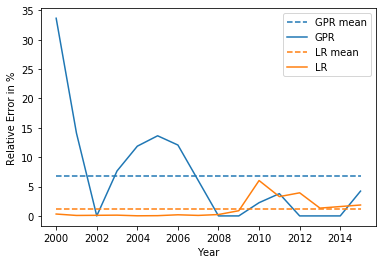

In [14]:
# error computation for GPR 
years = columnExtractor(countryDataFrame,'Year').tolist()
error = errorComputation(countryDataFrame, countryQuantityPredict, 'Life expectancy',regression_type='GPR')
print('GPR error: ',error)
errorPlot(years, error, 'Year', 'Relative Error in %',regression_type='GPR',color='#1f77b4')

print('------------------------------------------')

years = columnExtractor(countryDataFrame,'Year').tolist()
error = errorComputation(countryDataFrame, countryQuantityPredictLR, 'Life expectancy',regression_type='LR')
print('LR error ',error)
errorPlot(years, error, 'Year', 'Relative Error in %',regression_type='LR',color='#ff7f0e')

plt.show()


#go with rmse for outliers 
#try using normalization